In [ ]:
import glob
import os

In [223]:
import matplotlib.pyplot as plt

# Create a pie chart of some data
def plot_chart(labels, sizes):
    assert len(labels) == len(sizes)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    total = sum(sizes)
    plt.suptitle(f"Data split of {total} images")
    plt.show()

# Dataset
The dataset is stored under `./data/dataset/` directory. It is split between training and testing data in separate folders. Each folder contains two subfolders, one for each class. The images are stored in `.jpg` format.

In [12]:
root = "./data/dataset/"

train_in = len(glob.glob(os.path.join(root, "train/in/*.jpg")))
train_out = len(glob.glob(os.path.join(root, "train/out/*.jpg")))
test_in = len(glob.glob(os.path.join(root, "test/in/*.jpg")))
test_out = len(glob.glob(os.path.join(root, "test/out/*.jpg")))
total_train = train_in + train_out
total_test = test_in + test_out
total_images = total_train + total_test

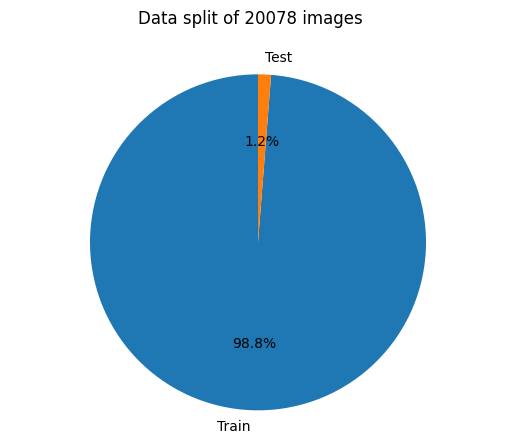

In [ ]:
# Create a pie chart of the data
labels = 'Train', 'Test'
sizes = [total_train, total_test]
plot_chart(labels, sizes)

It seems the train/test split is 99/1, which is not ideal. The following code will copy the original data and merge it into a single folder. Then, we can use a `train_test_split` function or a PyTorch `Subset` class to split the data into training and testing sets.
## Merge data


In [ ]:
import shutil

new_root = "./dataset/"
if not os.path.exists(new_root):
    os.makedirs(new_root, exist_ok=True)

    # Merge train and test images into one folder
    for split in ["train", "test"]:
        for img_class in ["in", "out"]:
            os.makedirs(os.path.join(new_root, img_class), exist_ok=True)
            for img_path in glob.glob(os.path.join(root, split, img_class, "*.jpg")):
                img_name = os.path.basename(img_path)
                shutil.copy(img_path, os.path.join(new_root, img_class, img_name))

## Classes
The classes should be rather balanced as the cat goes in and out equally (except for bugs).

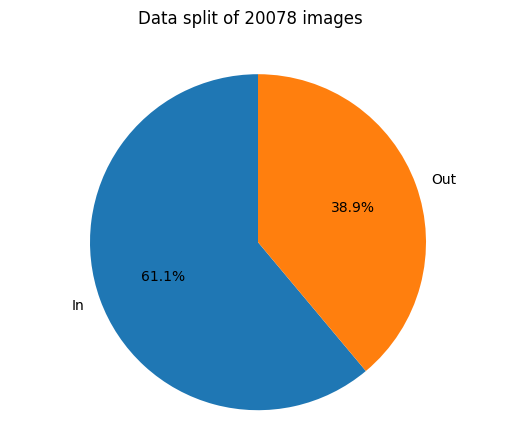

In [18]:
n_in = len(glob.glob(os.path.join(new_root, "in/*.jpg")))
n_out = len(glob.glob(os.path.join(new_root, "out/*.jpg")))

# Create a pie chart of the data
labels = 'In', 'Out'
sizes = [n_in, n_out]
plot_chart(labels, sizes)

## Images
Let's take a look at the images. Hopefully, they are of same size (HxWxC).

In [131]:
from PIL import Image
import numpy as np
import cv2

In [227]:
# Check the size of the images
from collections import defaultdict
sizes_dict = defaultdict(int)
new_root = "./dataset/"

for img_path in glob.glob(os.path.join(new_root, "*/*.jpg")):
    img = cv2.imread(img_path)
    shape = img.shape
    sizes_dict[shape] += 1

print(sizes_dict)

defaultdict(<class 'int'>, {(480, 640, 3): 15730, (240, 320, 3): 1700, (288, 384, 3): 709, (855, 1200, 3): 1419, (900, 1200, 3): 482, (450, 600, 3): 36, (901, 1053, 3): 1, (853, 1200, 3): 1})


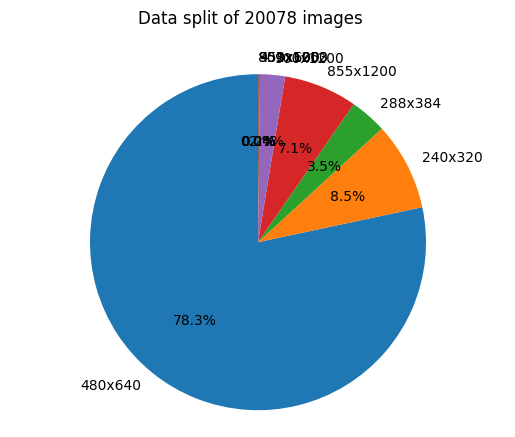

In [228]:
# Create a pie chart of the data
labels = [f"{k[0]}x{k[1]}" for k in sizes_dict.keys()]
sizes = sizes_dict.values()
plot_chart(labels, sizes)

In [130]:
for size in sizes:
    print(size)
    print("Aspect ratio:", size[1] / size[0])

(288, 384, 3)
Aspect ratio: 1.3333333333333333
(900, 1200, 3)
Aspect ratio: 1.3333333333333333
(855, 1200, 3)
Aspect ratio: 1.4035087719298245
(480, 640, 3)
Aspect ratio: 1.3333333333333333
(853, 1200, 3)
Aspect ratio: 1.4067995310668229
(240, 320, 3)
Aspect ratio: 1.3333333333333333
(901, 1053, 3)
Aspect ratio: 1.1687014428412874
(450, 600, 3)
Aspect ratio: 1.3333333333333333


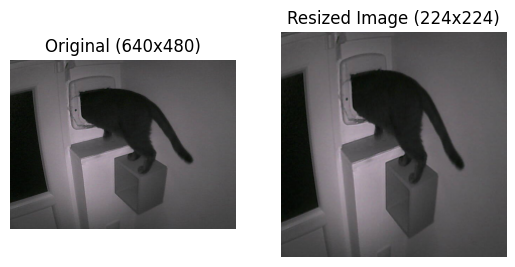

In [212]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

new_root = "./dataset/"
# Display a random image
def display_random_image():
    img_path = np.random.choice(glob.glob(os.path.join(new_root, "*/*.jpg")))
    img = Image.open(img_path)
    # Show the image and a 224x224 resized version
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img)
    ax[0].axis("off")
    ax[0].set_title(f"Original ({img.size[0]}x{img.size[1]})")
    img = img.resize((224, 224))
    ax[1].imshow(img)
    ax[1].axis("off")
    ax[1].set_title(f"Resized Image (224x224)")
    plt.show()


display_random_image()

Some images are of different sizes. We will resize them to a common size by creating a special dataset class.